In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set default style for plots
sns.set(style='whitegrid')


In [2]:
# Load the dataset
tcs = pd.read_csv(r"/content/TCS_stock_history.csv")
tcs


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [14]:
tcs1 = tcs.drop(['Date','Dividends','Stock Splits'], axis = 1)
tcs1

,Open,High,Low,Close,Volume
0,28.794172,29.742206,28.794172,29.519140,212976
1,29.556316,30.030333,28.905705,29.119476,153576
2,29.184536,29.184536,26.563503,27.111877,822776
3,27.111877,27.111877,27.111877,27.111877,0
4,26.972458,28.255089,26.582090,27.046812,811856
...,...,...,...,...,...
4458,3890.000000,3944.399902,3855.000000,3871.300049,2320754
4459,3900.000000,3904.000000,3802.899902,3836.949951,1673362
4460,3850.000000,3850.000000,3751.250000,3779.149902,2253075
4461,3759.800049,3806.000000,3722.149902,3791.899902,2489161


In [15]:
tcs1.isnull().sum()


,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [16]:
tcs1.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [17]:
tcs1.describe(include="all")

,Open,High,Low,Close,Volume
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07


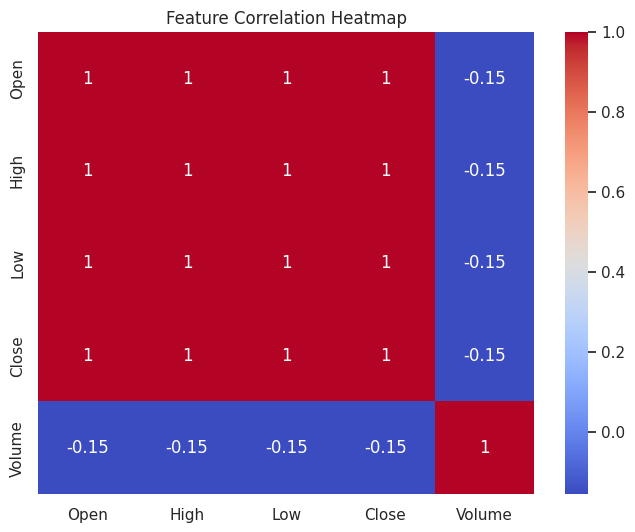

In [20]:

plt.figure(figsize=(8, 6))
sns.heatmap(tcs1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
# Define input and output
features = ['Open', 'High', 'Low', 'Volume']
X = tcs1[features]
y = tcs1['Close']


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [25]:
y_pred = model.predict(X_test_scaled)

# Combine predictions and actuals into a DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results.head()


,Actual,Predicted
0,108.608734,108.773449
1,223.080215,221.680270
2,451.169678,444.787522
3,152.938675,153.775894
4,1103.381714,1095.719709


In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 35.37
R² Score: 0.9999


In [28]:
# Example: Predict with new data [open, high, low, volume]
new_data = np.array([[3805.000000,3805.000000,3765.000000,640479]])
new_data_scaled = scaler.transform(new_data)
predicted_close = model.predict(new_data_scaled)
print(f"Predicted Close Price: {predicted_close[0]:.2f}")


Predicted Close Price: 3772.82


In [ ]:
import pickle
with open("tcs_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tcs_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
